In [2]:
import pandas as pd
import os
import pathlib as path
import matplotlib.pyplot as plt
import scipy as ct
import numpy as np

In [3]:
movie_performance_df = pd.read_csv("dc_marvel_movie_performance.csv")

In [4]:
print(movie_performance_df.columns)

Index(['Film', 'U.S. release date',
       'Box office gross Domestic (U.S. and Canada )',
       'Box office gross Other territories', 'Box office gross Worldwide',
       'Budget', 'MCU', 'Phase', 'Distributor', 'MPAA Rating', 'Length',
       'Minutes', 'Franchise', 'Character Family', 'Domestic %',
       'Gross to Budget', 'Rotten Tomatoes Critic Score', 'Male/Female-led',
       'Year', 'Inflation Adjusted Worldwide Gross',
       'Inflation Adjusted Budget', '2.5x prod', 'Break Even'],
      dtype='object')


In [5]:
movie_performance_df.dtypes

Film                                             object
U.S. release date                                object
Box office gross Domestic (U.S. and Canada )     object
Box office gross Other territories               object
Box office gross Worldwide                       object
Budget                                           object
MCU                                                bool
Phase                                           float64
Distributor                                      object
MPAA Rating                                      object
Length                                           object
Minutes                                           int64
Franchise                                        object
Character Family                                 object
Domestic %                                       object
Gross to Budget                                 float64
Rotten Tomatoes Critic Score                      int64
Male/Female-led                                 

In [6]:
movie_performance_df.head()

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
0,Superman,15/12/1978,"$134,478,449.00","$166,000,000.00","$300,478,449.00","$55,000,000.00",False,NaN,Warner Bros.,PG,...,Superman,45%,5.46,94,Male,1978,"$1,404,237,104.00","$257,033,544.00","$137,500,000.00",Success
1,Superman II,19/06/1981,"$108,185,706.00","$108,200,000.00","$216,385,706.00","$54,000,000.00",False,NaN,Warner Bros.,PG,...,Superman,50%,4.01,83,Male,1981,"$725,336,273.00","$181,010,842.00","$135,000,000.00",Success
2,Superman III,17/06/1983,"$59,950,623.00","$20,300,000.00","$80,250,623.00","$39,000,000.00",False,NaN,Warner Bros.,PG,...,Superman,75%,2.06,29,Male,1983,"$245,506,947.00","$119,310,861.00","$97,500,000.00",Flop
3,Supergirl,21/11/1984,"$14,296,438.00",NaN,"$14,296,438.00","$35,000,000.00",False,NaN,Tri-Star Pictures,PG,...,Superman,100%,0.41,8,Female,1984,"$41,926,345.00","$102,642,497.00","$87,500,000.00",Flop
4,Howard the Duck,01/08/1986,"$16,295,774.00","$21,667,000.00","$37,962,774.00","$37,000,000.00",False,NaN,Universal Pictures,PG,...,Howard the Duck,43%,1.03,13,Male,1986,"$37,962,774.00","$37,000,000.00","$92,500,000.00",Flop


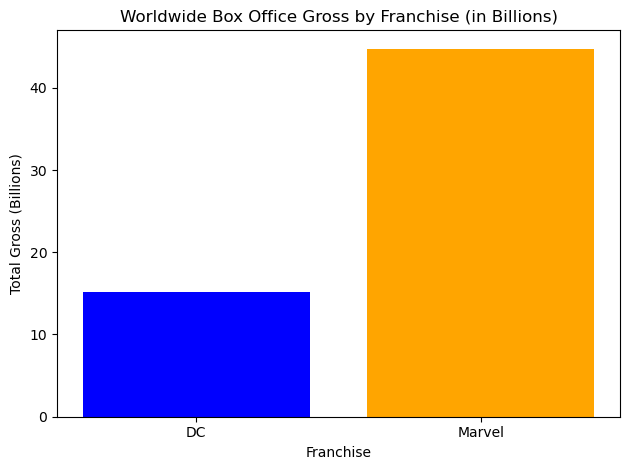

In [9]:
#convert from object to float
movie_performance_df['Box office gross Worldwide'] = (
    movie_performance_df['Box office gross Worldwide']
    .replace({'\\$': '', ',': ''}, regex=True)
    .astype(float)
)

# Group by MCU vs. DC
total_gross_by_franchise = movie_performance_df.groupby('Franchise')['Box office gross Worldwide'].sum()

# Convert to billions
total_gross_by_franchise_billion = total_gross_by_franchise / 1000000000

# Plotting
plt.bar(total_gross_by_franchise_billion.index, total_gross_by_franchise_billion, color=['blue', 'orange'])

# Add titles and labels
plt.title('Worldwide Box Office Gross by Franchise (in Billions)')
plt.xlabel('Franchise')
plt.ylabel('Total Gross (Billions)')
plt.xticks(rotation=0)  
plt.grid(False)

# show graph
plt.tight_layout()
plt.savefig(os.path.join('images','WorldwideGross_Franchise.png'))
plt.show()


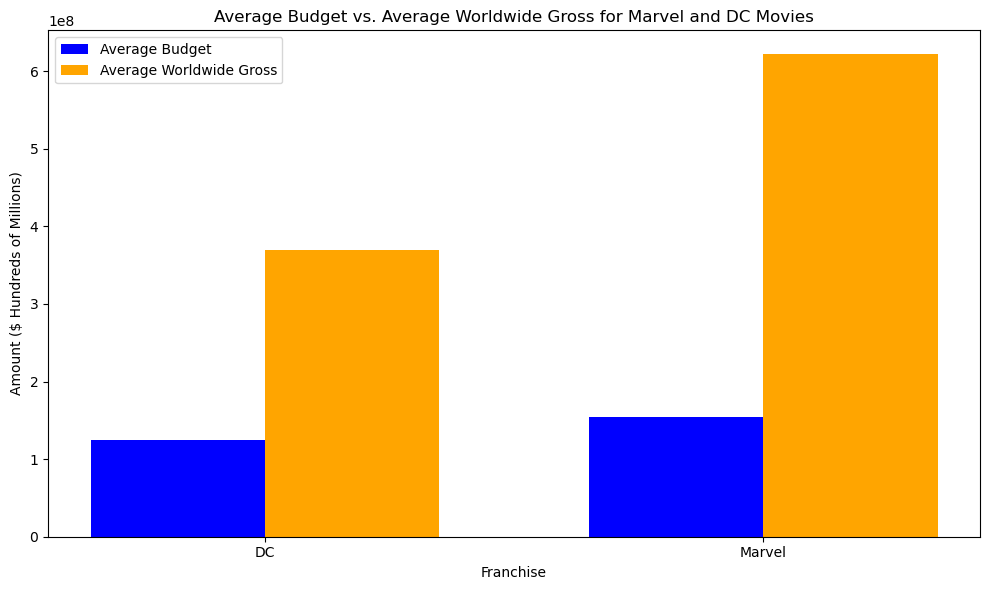

In [8]:
movie_performance_df['Box office gross Worldwide'] = (
    movie_performance_df['Box office gross Worldwide']
    .replace({'\\$': '', ',': ''}, regex=True)
    .astype(float)
)

# Convert the Budget from object to float
movie_performance_df['Budget'] = (
    movie_performance_df['Budget']
    .replace({'\\$': '', ',': ''}, regex=True)
    .astype(float)
)
# Calculate averages
averages = movie_performance_df.groupby('Franchise').agg({'Budget': 'mean', 'Box office gross Worldwide': 'mean'}).reset_index()

# Plotting
bar_width = 0.35
x = np.arange(len(averages))  # Use np.arange for positions

# Create the figure
plt.figure(figsize=(10, 6))

# Create bars for Budget and Worldwide Gross
plt.bar(x, averages['Budget'], width=bar_width, label='Average Budget', color='blue')
plt.bar(x + bar_width, averages['Box office gross Worldwide'], width=bar_width, label='Average Worldwide Gross', color='orange')  # Simplified line

# Adding labels and title
plt.xlabel('Franchise')
plt.ylabel('Amount ($ Hundreds of Millions)')
plt.title('Average Budget vs. Average Worldwide Gross for Marvel and DC Movies')
plt.xticks(x + bar_width / 2, averages['Franchise'])  # Center x-ticks

plt.legend()

# Display the bar graph
plt.tight_layout()
plt.savefig(os.path.join('images','avgbudget_v_avgWorldwideGross.png'))
plt.show()
